In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
datadir = r"C:\Users\user\Desktop\sentdexmL\neuralnetwork\PetImages"
categories = ["Dog","Cat"]
print(categories)

['Dog', 'Cat']


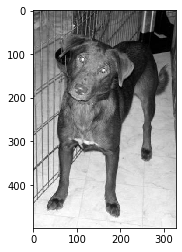

In [3]:
for category in categories:
    path = os.path.join(datadir, category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(499, 327)


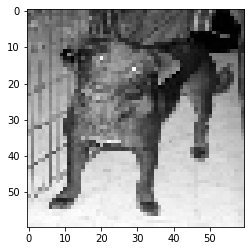

In [5]:
#resizing our images so that all have same dimensions
img_size = 60

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)#path to cats or dogs dir
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])

create_training_data()

In [7]:
print(len(training_data))

10000


In [8]:
import random
random.shuffle(training_data)

In [9]:
X=[]
y=[]

In [10]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)

In [11]:
import keras

Using TensorFlow backend.


In [12]:
#part-1
#Building the cnn
#Importing the keras libraries and packages
from keras.models import Sequential#it is used to initialilze the cnn as a sequence of layers
from keras.layers import Convolution2D#it is used to add the convolution layers or different feature maps
from keras.layers import MaxPooling2D#to do max pooling of of each feature map and convert them into pooled feature map
from keras.layers import Flatten#it is used to convert all the pooled feature maps into large feature vector that then becomes the input of our fully connected layers 
from keras.layers import Dense#it is used to add the fully connected layers into the ANN
from keras.callbacks import TensorBoard#can be used to plot runtime graphs and compare different models

In [13]:
X=X/255.0

In [14]:
#Initialising the CNN
classifier= Sequential()#it will classify an image into dog or a cat

#Step1 Convolution
classifier.add(Convolution2D(32,(3,3), input_shape=X.shape[1:], activation='relu'))#32,3,3 will create 32 filter of 3X3 so it will give 32 feature map and input_shape=(64,64,3) will restrict all images into coloured images of 64piX64pi  because we want our input images of fixed size(note: we can use 1028*1028*3 if we have powerful gpu

#step2 MaxPooling
#note: pooling ki wjah(see copy)
classifier.add(MaxPooling2D(pool_size=(2,2)))#it will use 2X2 window and a stride of 2

In [15]:
#adding a hidden second layer
classifier.add(Convolution2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#Step3 Flattening
classifier.add(Flatten())

In [17]:
#Step4 Full connection
classifier.add(Dense(units = 128, activation='relu'))#adding the fully connected hidden layer(note: no. of hidden layer nodes ki choice is generally near 100)
classifier.add(Dense(units = 1, activation='sigmoid'))

#Compiling the cnn
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])#adam is schoastic gradient descent algo

In [ ]:
#part-2(optional i.e. to increase model accuracy)
#here we'll do image Augumentation(image badhana)i.e to prevent overfitting on training set(overfitting happens when we have less data to train)
#becz image Aug will use imagedatagenerator and create many batches of our images and in each batch it will apply some random transformations(zoom,flip,rotate,shift,shear..etc) on random selection of our images so we'll have lot more material to train
#so Image Aug will allow us to enrich our dataset without adding more data to prevent overfitting

In [18]:
classifier.fit(X,y,epochs=6,validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/6
9000/9000 [==============================] - 66s 7ms/step - loss: 0.6788 - acc: 0.5627 - val_loss: 0.6492 - val_acc: 0.6200
Epoch 2/6
9000/9000 [==============================] - 66s 7ms/step - loss: 0.5876 - acc: 0.6916 - val_loss: 0.6097 - val_acc: 0.6840
Epoch 3/6
9000/9000 [==============================] - 67s 7ms/step - loss: 0.5127 - acc: 0.7489 - val_loss: 0.5515 - val_acc: 0.7290
Epoch 4/6
9000/9000 [==============================] - 68s 8ms/step - loss: 0.4721 - acc: 0.7764 - val_loss: 0.5345 - val_acc: 0.7370
Epoch 5/6
9000/9000 [==============================] - 69s 8ms/step - loss: 0.4391 - acc: 0.7939 - val_loss: 0.5281 - val_acc: 0.7460
Epoch 6/6
9000/9000 [==============================] - 67s 7ms/step - loss: 0.4036 - acc: 0.8196 - val_loss: 0.5417 - val_acc: 0.7510


In [19]:
#Testing our model on outside images
def prepare(filepath):
    img_size = 60
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

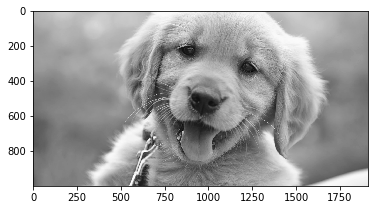

In [24]:
#lets check what our classifier predict for this image
check_array_1 = cv2.imread('dog_test.jpeg',0)
plt.imshow(check_array_1,cmap='gray')

In [27]:
prediction = classifier.predict([prepare('dog_test.jpeg')])
print('Predicted Category:',categories[int(prediction[0][0])])

Predicted Category: Dog


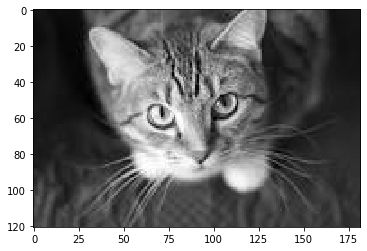

In [36]:
#lets check what our classifier predict for this image
check_array_2 = cv2.imread('download.jpg',0)
plt.imshow(check_array_2,cmap='gray')

In [37]:
prediction = classifier.predict([prepare('download.jpg')])
print('Predicted Category:',categories[int(prediction[0][0])])

Predicted Category: Cat


In [ ]:
#so our model predicted both images(not part of training set) correctly 